In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
import numpy as np

import lbg_forecast.sps as sps
import lbg_forecast.popmodel as pop
import lbg_forecast.sfh as sfh
import lbg_forecast.igm as igm
import lbg_forecast.distributions as dstr
import lbg_forecast.hyperparams as hyp

In [3]:
def simulate_sample_photometry_dpl(nsamples, spectra=False):

    #Define SPS Model
    sps_model = sps.initialise_sps_model(sfh_type=3, dust_type=2)
    hyperparams = hyp.sample_hyper_parameters()
    i = 0
    photo_data = []
    source_data = []
    while(i <  nsamples):

        #Update Model and draw Priors
        sps_params = pop.galaxy_population_model_dpl(hyperparams)
        sps.update_sps_model_dpl(sps_model, sps_params)

        #Generate Photometry
        photo_data.append(sps.simulate_photometry_lsst_fsps(sps_model, logmass=sps_params[15]))
        source_data.append(sps_params)

        #Plot Spectra
        if(spectra):
            spectrum = sps.simulate_sed(sps_model, sps_params)
            
            sps.plot_sed(spectrum, scaley = 16, xmin=2000, xmax=12000, ymin=0,
                ymax=1.4, xsize=20, ysize=10, 
                fontsize=32, log=False, c = 'k')
            
            sps.plot_lsst_filters(factor=1)

        i+=1

    return [np.asarray(photo_data), np.asarray(source_data), hyperparams]

In [4]:
data = simulate_sample_photometry_dpl(1)
print(data)

[array([[32.94472684, 31.72230064, 30.9680449 , 30.3746403 , 29.8853313 ,
        29.34176156]]), array([[ 2.62439339,  0.75386509,  0.18129177,  1.39849905,  1.12824355,
         0.97245427, -2.80007157, -1.0747886 ,  9.39014328,  1.23370808,
         2.2972848 ,  2.29019165, -0.16727528,  2.41093526, -2.51595328,
        11.16527353]]), array([[ 2.36465107,  0.16658831],
       [ 0.2545375 ,  2.42783516],
       [ 0.06310882,  0.10464912],
       [ 1.73765533,  1.0445211 ],
       [ 0.57944721,  0.23476618],
       [ 1.        ,  0.25      ],
       [-2.32059769,  0.70731577],
       [-0.55130441,  2.27701229],
       [ 8.91760304,  4.93650573],
       [ 1.3       ,  0.1       ],
       [ 2.3       ,  0.1       ],
       [ 2.3       ,  0.1       ],
       [ 0.13336053,  0.39960758],
       [ 2.48897508,  0.69537117],
       [-2.98066989,  1.94628787],
       [12.80659079,  2.14329141]])]


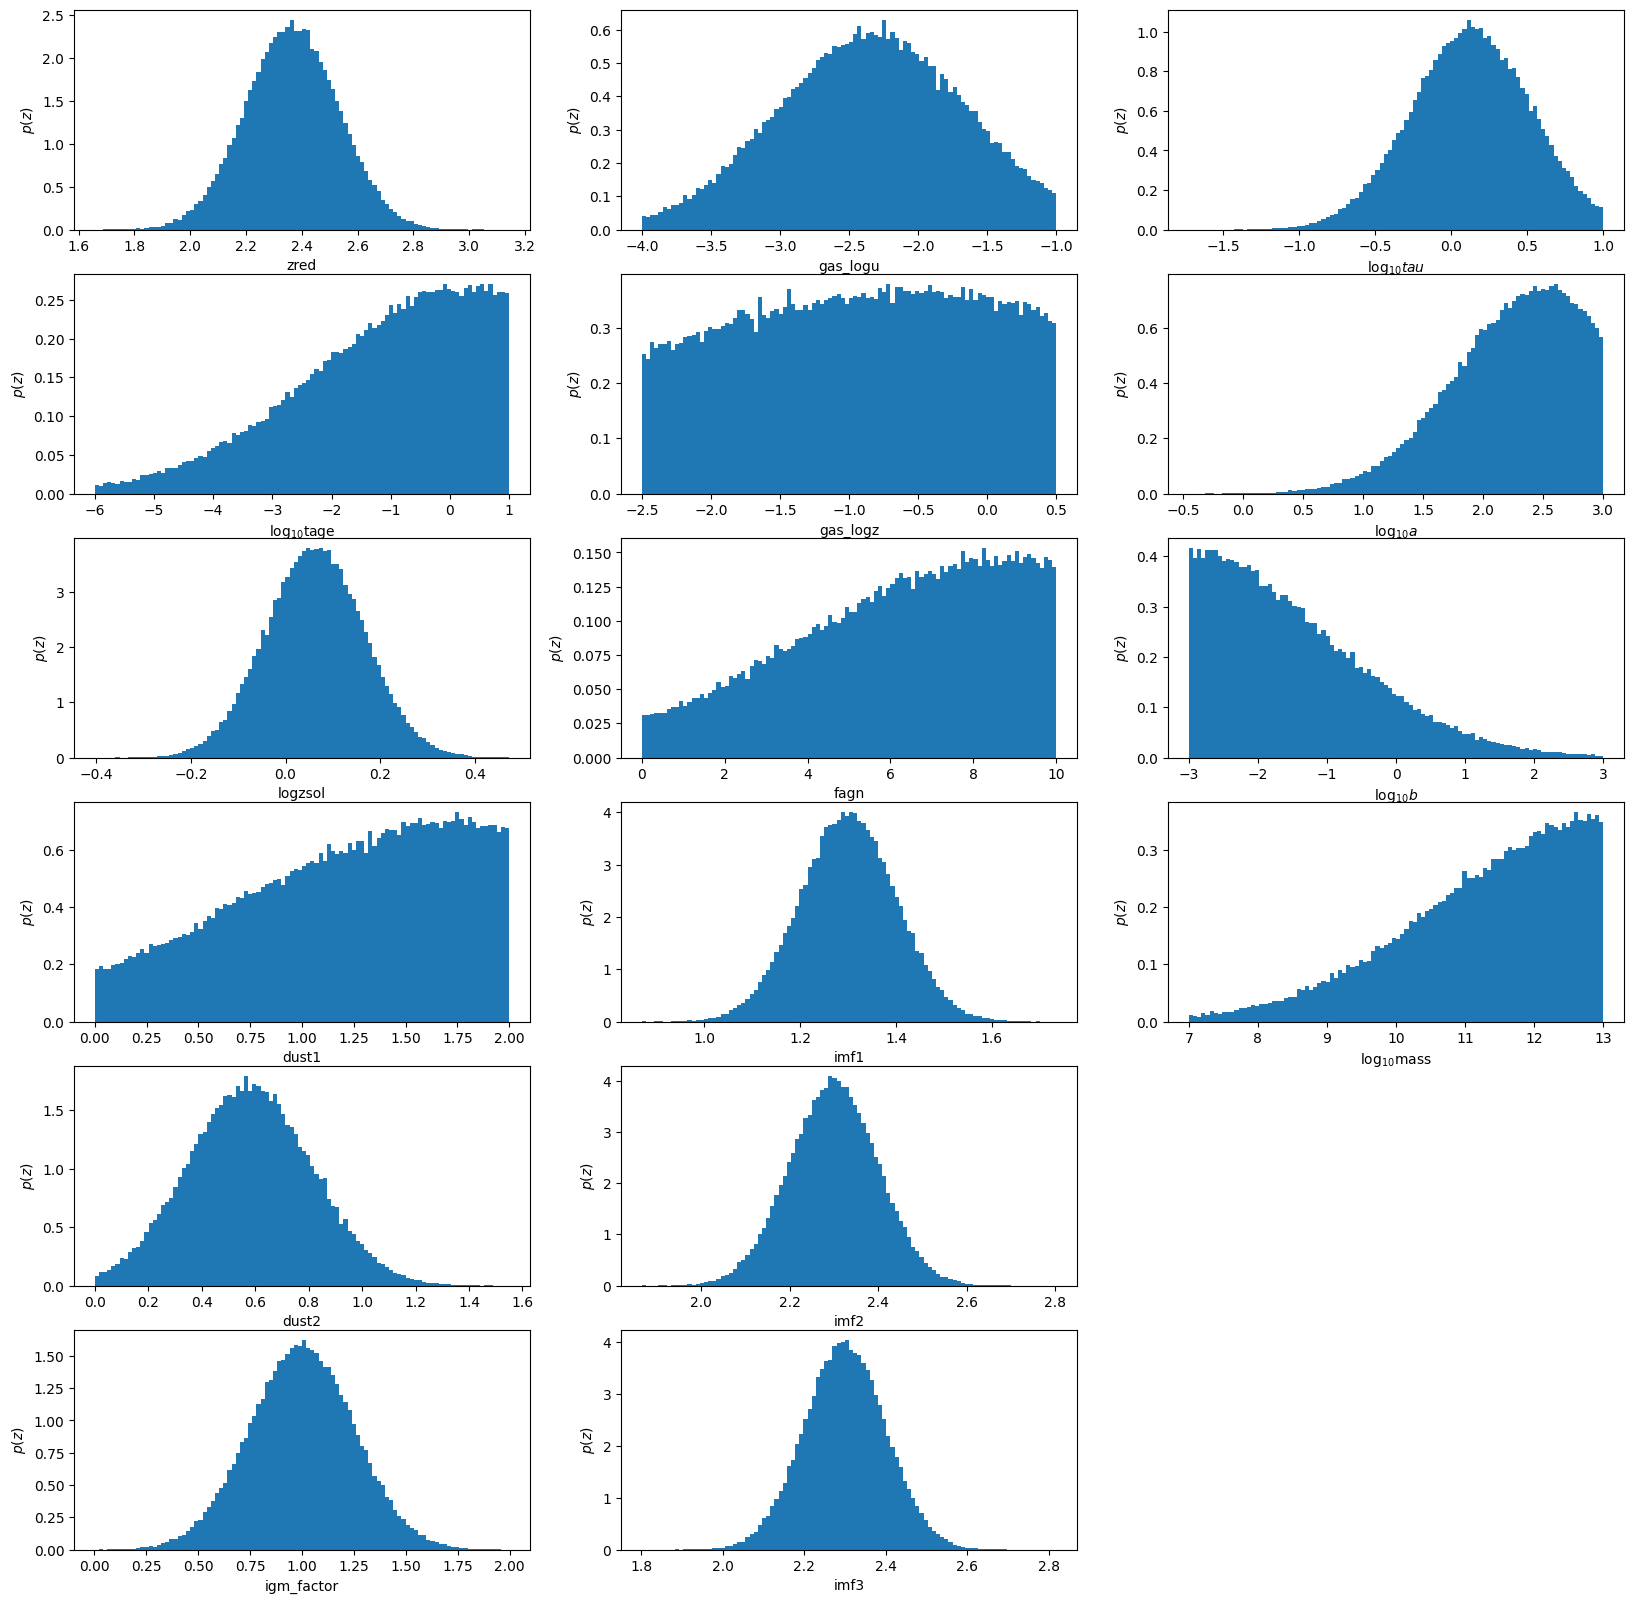

In [7]:
pop.plot_galaxy_population(100000, hparams=data[2], rows=6, nbins=100)